In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import linear_model

In [2]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Credit.csv', index_col=0)
data[['Gender']] = data[['Gender']] == "Female"

data.Gender = data.Gender.astype(int)

names = ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender']

X=data[names]
Y=data[['Balance']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)
N = 100
n = len(names)

# Normalization

In [3]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_ = scaler.transform(X_train)
X_test_ = scaler.transform(X_test)

scaler = preprocessing.StandardScaler().fit(Y_train)
Y_train_ = scaler.transform(Y_train)
Y_test_ = scaler.transform(Y_test)

In [4]:
coefs_norm = np.zeros((N, n + 1))
scores_norm = np.zeros(N)

lambdas = 2*np.logspace(-3, 0, N)
for i in range(N):
    clf = linear_model.Lasso(alpha=lambdas[i])
    clf.fit(X_train_, Y_train_)
    coefs_norm[i, 0] = clf.intercept_
    coefs_norm[i, 1:] = clf.coef_
    scores_norm[i] = clf.score(X_train_, Y_train_)

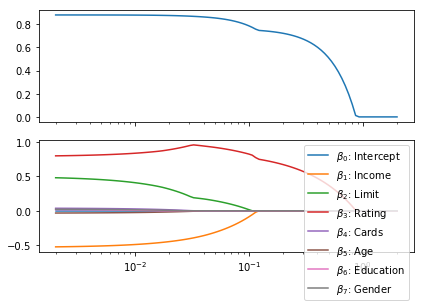

In [5]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.plot(lambdas, scores_norm)

for i in range(n+1):
    if i == 0: name = r"$\beta_0$: Intercept"
    else: name = r"$\beta_%d$: %s"%(i, names[i-1])
    ax2.plot(lambdas, coefs_norm[:, i], label=name)
    
coeffs = np.zeros(N)
for i in range(N):
    suma = np.sum(coefs_norm[i]**2)
    gender = coefs_norm[i, -1]**2
    coeffs[i] = 100*gender/suma

ax2.set_xscale('log')
ax2.legend()
fig.tight_layout()
plt.show()

# $\beta_\text{gender}$ representation to LASSO model

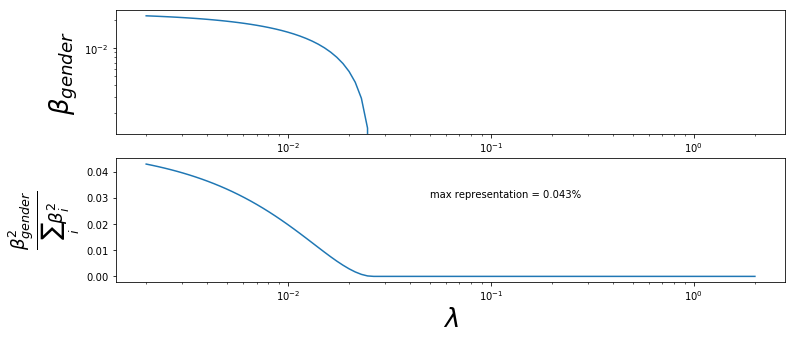

In [6]:
size = 26
fig, (ax1, ax2) = plt.subplots(2, figsize=(12,5))
ax1.plot(lambdas, coefs_norm[:, -1])
ax2.plot(lambdas, coeffs)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax2.set_xscale('log')
ax2.set_ylabel(r'$\frac{\beta^2_{gender}}{\sum_{i}{\beta}^2_i}$', fontsize=size)
ax1.set_ylabel(r'$\beta_{gender}$', fontsize=size)
ax2.set_xlabel('$\lambda$', fontsize=size)
plt.text(0.05, 0.03, "max representation = %.3f%%"%max(coeffs))
plt.show()

The F-test comparison done in the one-way Anova requires that the residuals are normally distributes, are not dependent between them and the error does not depend on the samples

In [43]:
Yfemale = Y[X['Gender']==1] 
Ymale = Y[np.logical_not(X['Gender']==1)]
Estimate = coefs_norm[1,0]+coefs_norm[0,1]*X['Income']+coefs_norm[1,2]*X['Limit']+coefs_norm[1,3]*X['Rating']+coefs_norm[1,4]*X['Cards']+coefs_norm[1,5]*X['Age']+coefs_norm[1,6]*X['Education']+coefs_norm[1,7]*X['Gender']
modelvar = np.var(Estimate-Y.mean())
errorvar = np.var(Estimate-Y['Balance'])
errorvarp = np.var(Y['Balance']-Y.mean())
totalvar = np.var(Y['Balance'])
CMT=totalvar/(Y.shape[0]-1)
CME=errorvar/(Y.shape[0]-2)
SST=Y.shape[0]*((Ymale.mean()-Y.mean())**2+(Yfemale.mean()-Y.mean())**2)
#A high value of F (much bigger than one) indicates that while considering the whole model and using the estimate, there is a significant difference between the genders incomes

A high value of F (much bigger than one) indicates that while considering the whole model and using the estimate, there is a significant difference between the genders incomes

In [44]:
F = SST/CME
print(F)

Balance    42.987456
dtype: float64
